# Plot only country 220

In [1]:
import os
from joblib import load
import numpy as np

#random220w24_200
#random220wrandom_500
#Finalrandomctr220wRand_200s8_30valid_2021  !!

user_dir = os.path.expanduser('~')
file_path = os.path.join(user_dir, 'iCloudDrive\\Joblib BA\\final hyperparam', 'Finalrandomctr220wRand_200s8_30valid_2021.joblib')
loaded_vars_rndHyperparam = load(file_path)

sorted_best_runs, country_to_plot, prediction_year, s = loaded_vars_rndHyperparam

Platz 1 - Bewertung: 279|Test loss: 283 - Hyperparameter: {'wmax': 12, 'numbHiddenL': 5, 'relNeurons': 0.58, 'lr': 0.134, 'featureSubset': 'wdi', 'batch_size': 6, 'dropoutrate': 0, 'epochs': 3, 'numbNeurons': 293.0, 'w': 12}
Platz 2 - Bewertung: 330|Test loss: 441 - Hyperparameter: {'wmax': 3, 'numbHiddenL': 5, 'relNeurons': 0.3, 'lr': 0.136, 'featureSubset': 'wdi', 'batch_size': 3, 'dropoutrate': 0.42, 'epochs': 4, 'numbNeurons': 123.0, 'w': 3}
Platz 3 - Bewertung: 375|Test loss: 260 - Hyperparameter: {'wmax': 5, 'numbHiddenL': 6, 'relNeurons': 0.67, 'lr': 0.136, 'featureSubset': 'wdi', 'batch_size': 5, 'dropoutrate': 0, 'epochs': 4, 'numbNeurons': 184.0, 'w': 5}
Platz 4 - Bewertung: 411|Test loss: 479 - Hyperparameter: {'wmax': 11, 'numbHiddenL': 6, 'relNeurons': 0.35, 'lr': 0.072, 'featureSubset': 'wdi', 'batch_size': 2, 'dropoutrate': 0, 'epochs': 4, 'numbNeurons': 246.0, 'w': 11}
Platz 5 - Bewertung: 420|Test loss: 67 - Hyperparameter: {'wmax': 8, 'numbHiddenL': 1, 'relNeurons': 0

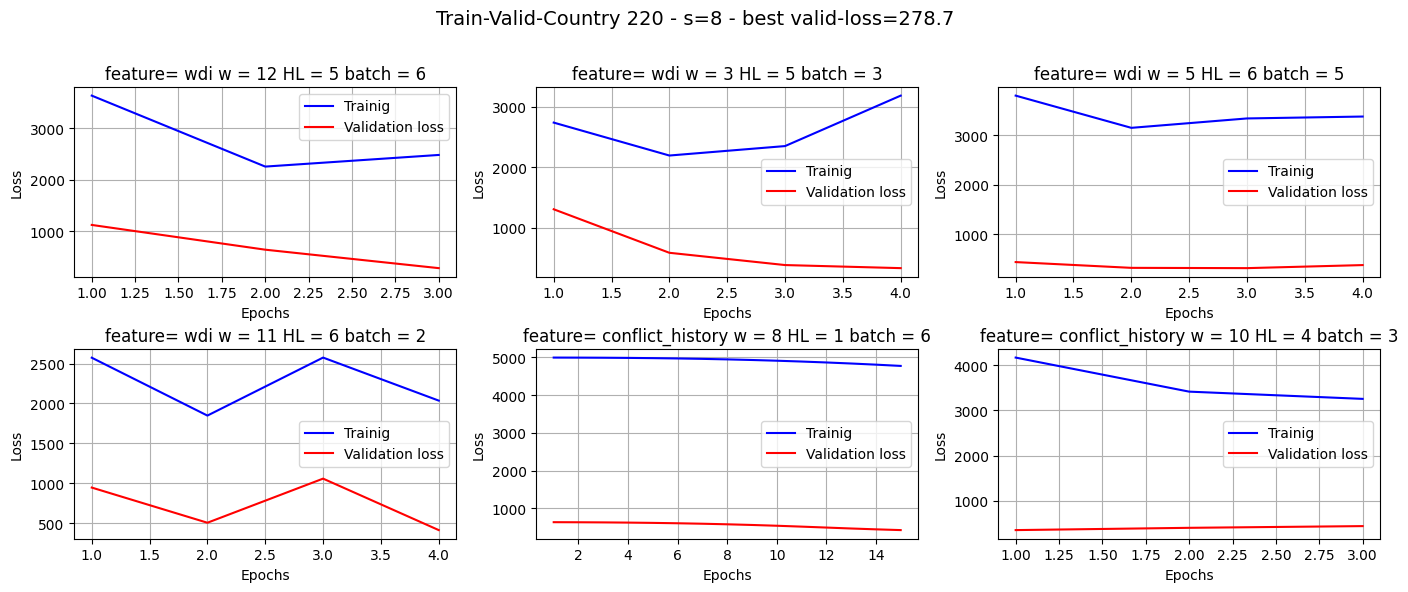

In [2]:
import numpy as np
import matplotlib.pyplot as plt

number_best_runs = 6
for i in range(number_best_runs):
    print(f"Platz {i+1} - Bewertung: {round(sorted_best_runs[i]['val_loss'][-1])}|Test loss: {round(sorted_best_runs[i]['crps_prediction'])} - Hyperparameter: {sorted_best_runs[i]['random_params']}")

# Erstelle eine Figur mit 1 Zeile und 3 Spalten für die beiden Plots nebeneinander und kleiner
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 6))

title_string = 'Train-Valid-Country ' + str(country_to_plot) + ' - s=' + str(s) + ' - best valid-loss=' + str(round(sorted_best_runs[0]['val_loss'][-1],1))

i = 0 #zeile
j = 0 #spalte

for k in range(6):

    best_run = sorted_best_runs[k]

    loss = best_run['loss']
    val_loss = best_run['val_loss']
    epochs = best_run['epochs']
        
    axes[i][j].plot(epochs, loss, color='blue', label='Trainig')
    axes[i][j].plot(epochs, val_loss, color='red', label='Validation loss')
    axes[i][j].set_title('feature= ' + str(best_run['random_params']['featureSubset']) + ' w = ' + str(best_run['random_params']['w']) + ' HL = ' + str(best_run['random_params']['numbHiddenL']) + ' batch = ' + str(best_run['random_params']['batch_size']) )
    axes[i][j].set_xlabel('Epochs')
    axes[i][j].set_ylabel('Loss')
    axes[i][j].legend()
    axes[i][j].grid(True)
    if j == 2:
        i += 1
        j = 0
    else:  
        j += 1

plt.tight_layout()  # Optimiere den Abstand zwischen den Subplots
plt.subplots_adjust(top=0.85)  # Mache Platz für den Haupttitel außerhalb des Plotbereichs
fig.suptitle(title_string, y=0.98, fontsize=14)
plt.show()

# Plots for multiple country minimization

In [3]:
import os
from joblib import load
import numpy as np

user_dir = os.path.expanduser('~')
file_path = os.path.join(user_dir, 'iCloudDrive\\Joblib BA\\final hyperparam', 'FinalrandomctrAllwRand12_50s8_30valid_2021.joblib')
loaded_vars_rndHyperparam = load(file_path)

country_selected_hyperparam_list, prediction_year, country_list, zero_fatalities_country_list = loaded_vars_rndHyperparam

Platz 1 - Bewertung: 375|Test loss: 260 - Hyperparameter: {'wmax': 5, 'numbHiddenL': 6, 'relNeurons': 0.67, 'lr': 0.136, 'featureSubset': 'wdi', 'batch_size': 5, 'dropoutrate': 0, 'epochs': 4, 'numbNeurons': 184.0, 'w': 5}
Platz 2 - Bewertung: 462|Test loss: 477 - Hyperparameter: {'wmax': 6, 'numbHiddenL': 5, 'relNeurons': 0.86, 'lr': 0.044, 'featureSubset': 'ged', 'batch_size': 3, 'dropoutrate': 0, 'epochs': 4, 'numbNeurons': 173.0, 'w': 6}
Platz 3 - Bewertung: 463|Test loss: 331 - Hyperparameter: {'wmax': 7, 'numbHiddenL': 6, 'relNeurons': 0.19, 'lr': 0.056, 'featureSubset': 'all', 'batch_size': 3, 'dropoutrate': 0.12, 'epochs': 13, 'numbNeurons': 252.0, 'w': 7}
Platz 4 - Bewertung: 502|Test loss: 599 - Hyperparameter: {'wmax': 2, 'numbHiddenL': 1, 'relNeurons': 0.42, 'lr': 0.026, 'featureSubset': 'wdi', 'batch_size': 3, 'dropoutrate': 0, 'epochs': 5, 'numbNeurons': 119.0, 'w': 2}
Platz 5 - Bewertung: 669|Test loss: 737 - Hyperparameter: {'wmax': 7, 'numbHiddenL': 4, 'relNeurons': 0.

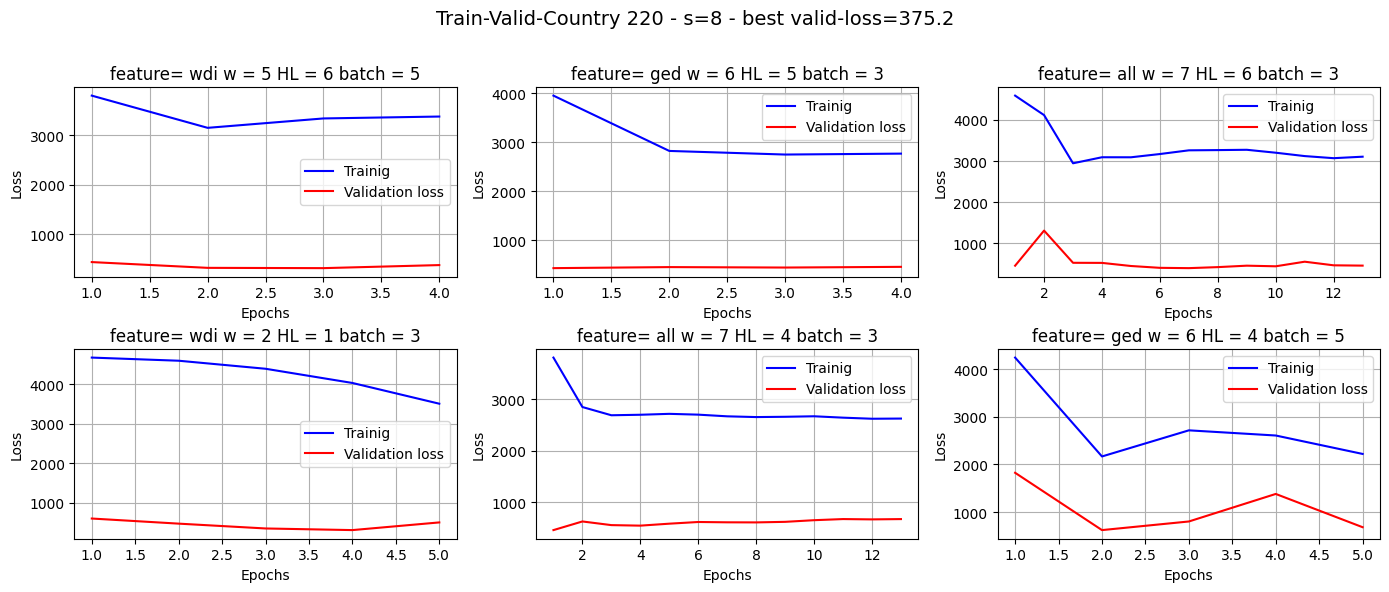

In [4]:
country_to_plot = 220

def find_country_runs(country_id, hyperparam_list):
    country_list_local = []
    for i in range(len(hyperparam_list)):
        country = hyperparam_list[i]['country']
        country_list_local.append(country)
        if country == country_id:
            # 0 ist the first element in the 50 rndm hyperparams list -> minimal val_loss
            return hyperparam_list[i]
        
    if country_id not in country_list:
        raise ValueError("Country is not in the Hyperparameter list.")


sorted_best_runs_dict = find_country_runs(country_to_plot, country_selected_hyperparam_list)
sorted_best_runs = sorted_best_runs_dict['hyperparams']
s = sorted_best_runs_dict['s']

import numpy as np
import matplotlib.pyplot as plt

number_best_runs = 6
for i in range(number_best_runs):
    print(f"Platz {i+1} - Bewertung: {round(sorted_best_runs[i]['val_loss'][-1])}|Test loss: {round(sorted_best_runs[i]['crps_prediction'])} - Hyperparameter: {sorted_best_runs[i]['random_params']}")


country_index = 0

# Erstelle eine Figur mit 1 Zeile und 3 Spalten für die beiden Plots nebeneinander und kleiner
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 6))

title_string = 'Train-Valid-Country ' + str(country_to_plot) + ' - s=' + str(s) + ' - best valid-loss=' + str(round(sorted_best_runs[0]['val_loss'][-1],1))

i = 0 #zeile
j = 0 #spalte

for k in range(number_best_runs):

    best_run = sorted_best_runs[k]

    loss = best_run['loss']
    val_loss = best_run['val_loss']
    epochs = best_run['epochs']
        
    axes[i][j].plot(epochs, loss, color='blue', label='Trainig')
    axes[i][j].plot(epochs, val_loss, color='red', label='Validation loss')
    axes[i][j].set_title('feature= ' + str(best_run['random_params']['featureSubset']) + ' w = ' + str(best_run['random_params']['w']) + ' HL = ' + str(best_run['random_params']['numbHiddenL']) + ' batch = ' + str(best_run['random_params']['batch_size']) )
    axes[i][j].set_xlabel('Epochs')
    axes[i][j].set_ylabel('Loss')
    axes[i][j].legend()
    axes[i][j].grid(True)
    if j == 2:
        i += 1
        j = 0
    else:  
        j += 1

plt.tight_layout()  # Optimiere den Abstand zwischen den Subplots
plt.subplots_adjust(top=0.85)  # Mache Platz für den Haupttitel außerhalb des Plotbereichs
fig.suptitle(title_string, y=0.98, fontsize=14)
plt.show()

In [7]:
sorted_best_runs[0]

{'loss': [3802.147705078125,
  3150.686767578125,
  3340.68994140625,
  3379.17138671875],
 'val_loss': [435.89849853515625,
  319.2428894042969,
  313.4458923339844,
  375.1953430175781],
 'epochs': range(1, 5),
 'y_true': 148.0,
 'crps_prediction': 259.572625,
 'random_params': {'wmax': 5,
  'numbHiddenL': 6,
  'relNeurons': 0.67,
  'lr': 0.136,
  'featureSubset': 'wdi',
  'batch_size': 5,
  'dropoutrate': 0,
  'epochs': 4,
  'numbNeurons': 184.0,
  'w': 5},
 'seed': 20}

Platz 1 - Bewertung: 88|Test loss: 88 - Hyperparameter: {'wmax': 11, 'numbHiddenL': 2, 'relNeurons': 0.49, 'lr': 0.082, 'featureSubset': 'vdem', 'batch_size': 4, 'dropoutrate': 0, 'epochs': 35, 'numbNeurons': 182.0, 'w': 11}
Platz 2 - Bewertung: 99|Test loss: 95 - Hyperparameter: {'wmax': 8, 'numbHiddenL': 3, 'relNeurons': 0.13, 'lr': 0.023, 'featureSubset': 'ged', 'batch_size': 4, 'dropoutrate': 0, 'epochs': 26, 'numbNeurons': 33.0, 'w': 8}
Platz 3 - Bewertung: 103|Test loss: 101 - Hyperparameter: {'wmax': 3, 'numbHiddenL': 4, 'relNeurons': 0.69, 'lr': 0.012, 'featureSubset': 'ged', 'batch_size': 1, 'dropoutrate': 0.25, 'epochs': 6, 'numbNeurons': 139.0, 'w': 3}
Platz 4 - Bewertung: 104|Test loss: 106 - Hyperparameter: {'wmax': 10, 'numbHiddenL': 1, 'relNeurons': 0.66, 'lr': 0.124, 'featureSubset': 'wdi', 'batch_size': 1, 'dropoutrate': 0.26, 'epochs': 11, 'numbNeurons': 240.0, 'w': 10}


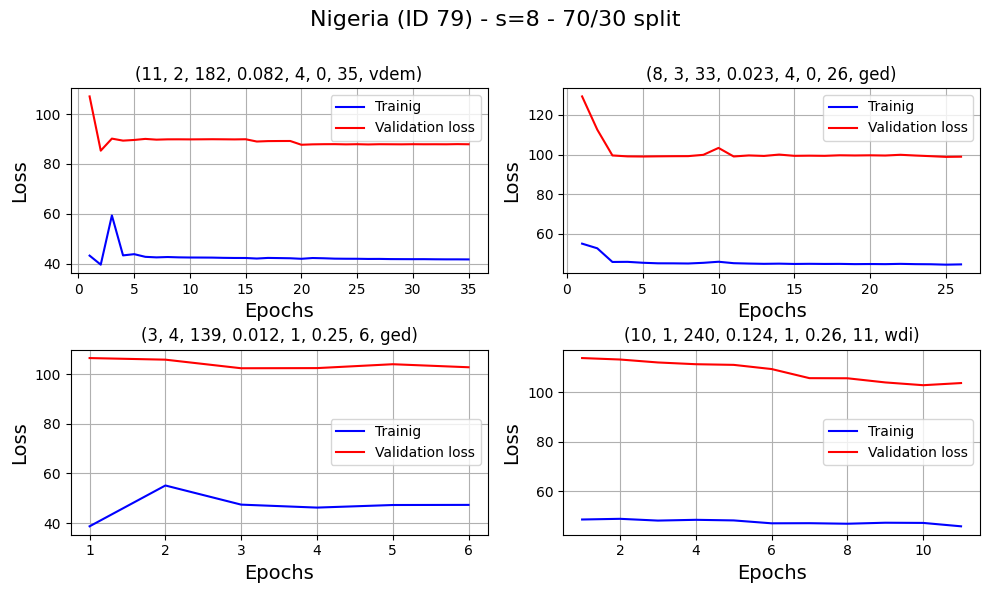

In [12]:
country_to_plot = 79

def find_country_runs(country_id, hyperparam_list):
    country_list_local = []
    for i in range(len(hyperparam_list)):
        country = hyperparam_list[i]['country']
        country_list_local.append(country)
        if country == country_id:
            # 0 ist the first element in the 50 rndm hyperparams list -> minimal val_loss
            return hyperparam_list[i]
        
    if country_id not in country_list:
        raise ValueError("Country is not in the Hyperparameter list.")


sorted_best_runs_dict = find_country_runs(country_to_plot, country_selected_hyperparam_list)
sorted_best_runs = sorted_best_runs_dict['hyperparams']
s = sorted_best_runs_dict['s']

import numpy as np
import matplotlib.pyplot as plt

number_best_runs = 4
for i in range(number_best_runs):
    print(f"Platz {i+1} - Bewertung: {round(sorted_best_runs[i]['val_loss'][-1])}|Test loss: {round(sorted_best_runs[i]['crps_prediction'])} - Hyperparameter: {sorted_best_runs[i]['random_params']}")


country_index = 0

# Erstelle eine Figur mit 1 Zeile und 3 Spalten für die beiden Plots nebeneinander und kleiner
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

title_string = 'Nigeria (ID ' + str(country_to_plot) + ') - s=' + str(s) + ' - 70/30 split'

i = 0 #zeile
j = 0 #spalte

for k in range(number_best_runs):

    best_run = sorted_best_runs[k]

    loss = best_run['loss']
    val_loss = best_run['val_loss']
    epochs = best_run['epochs']
        
    axes[i][j].plot(epochs, loss, color='blue', label='Trainig')
    axes[i][j].plot(epochs, val_loss, color='red', label='Validation loss')
    #axes[i][j].set_title('fsub= ' + str(best_run['random_params']['featureSubset']) + ' w = ' + str(best_run['random_params']['w']) + ' h = ' + str(best_run['random_params']['numbHiddenL']) + ' b = ' + str(best_run['random_params']['batch_size']) )
    axes[i][j].set_title('(' + str(best_run['random_params']['w']) + ', ' + str(best_run['random_params']['numbHiddenL']) + ', ' + str(int(best_run['random_params']['numbNeurons'])) + ', ' + str(best_run['random_params']['lr']) + ', ' + str(best_run['random_params']['batch_size']) + ', ' + str(best_run['random_params']['dropoutrate']) + ', ' + str(best_run['random_params']['epochs']) + ', ' + str(best_run['random_params']['featureSubset']) + ')')
    axes[i][j].set_xlabel('Epochs', fontsize=14)
    axes[i][j].set_ylabel('Loss', fontsize=14)
    axes[i][j].legend()
    axes[i][j].grid(True)
    if j == 1:
        i += 1
        j = 0
    else:  
        j += 1

plt.tight_layout()  # Optimiere den Abstand zwischen den Subplots
plt.subplots_adjust(top=0.85)  # Mache Platz für den Haupttitel außerhalb des Plotbereichs
fig.suptitle(title_string, y=0.98, fontsize=16)
plt.show()